<a href="https://colab.research.google.com/github/Jorge-89/Regresiones_TP_UNSAM/blob/main/Red%20Neuronal%20Convolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

In [4]:

#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Regresion-Lineal-/main/base_datos_estaciones_met_V3_train.csv'
df = pd.read_csv(url, sep=",")
df.columns

Index(['Unnamed: 0', 'fecha_completa', 'Fecha', 'Hora',
       'Temp_Alicia AgriculturaCba', 'Humedad_Alicia AgriculturaCba',
       'PP_Alicia AgriculturaCba', 'Temp_Las Varas AgriculturaCba',
       'Humedad_Las Varas AgriculturaCba', 'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [28]:
x= df[[ 'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
        'Temp_San Miguel - Establecimiento Don Luis', 'Humedad_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'Temp_ San Miguel - Las Varillas', 'Humedad_ San Miguel - Las Varillas']]
y= df["Temp_Alicia AgriculturaCba"]

In [29]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [31]:
#Estandarizo las features, las redes son muy sensibles a datos no escalados.
scaler_labels = StandardScaler()
x_train = scaler_labels.fit_transform(x_train)
x_test = scaler_labels.transform(x_test)

In [36]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print(x_test.shape)


(2074, 8, 1)


In [61]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(8, 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
 
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 7, 32)             96        
_________________________________________________________________
flatten_5 (Flatten)          (None, 224)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                14400     
_________________________________________________________________
dense_11 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 15,553
Trainable params: 15,553
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.fit(x_train, y_train, batch_size=32,epochs=50)

Epoch 1/50
260/260 [==============================] - 1s 1ms/step - loss: 92.0767
Epoch 2/50
260/260 [==============================] - 0s 1ms/step - loss: 1.3190
Epoch 3/50
260/260 [==============================] - 0s 1ms/step - loss: 0.7612
Epoch 4/50
260/260 [==============================] - 0s 1ms/step - loss: 0.6905
Epoch 5/50
260/260 [==============================] - 0s 1ms/step - loss: 0.6736
Epoch 6/50
260/260 [==============================] - 0s 2ms/step - loss: 0.6560
Epoch 7/50
260/260 [==============================] - 0s 2ms/step - loss: 0.6479
Epoch 8/50
260/260 [==============================] - 0s 1ms/step - loss: 0.6424
Epoch 9/50
260/260 [==============================] - 0s 2ms/step - loss: 0.6433
Epoch 10/50
260/260 [==============================] - 0s 1ms/step - loss: 0.6526
Epoch 11/50
260/260 [==============================] - 0s 2ms/step - loss: 0.6343
Epoch 12/50
260/260 [==============================] - 0s 1ms/step - loss: 0.6370
Epoch 13/50
260/260 [===

In [63]:
y_pred_test = model.predict(x_test)
y_pred_test

array([[24.123266],
       [26.675785],
       [14.831918],
       ...,
       [33.527958],
       [27.557592],
       [28.64097 ]], dtype=float32)

In [64]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')
score_testeo = mean_squared_error(y_test,y_pred_test,squared= True)

print (score_testeo)

Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
0.6337621045319877


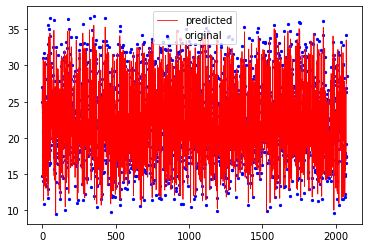

In [65]:
x_ax = range(len(y_pred_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred_test, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()